In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from train_face_model import train_face_model
from cnn_face_search import cnn_face_search
from draw_rectangle import draw_rectangle
import time
#from train_face_model import train_face_model  # Assuming you have saved the function in a separate file

# Load your face and non-face datasets (make sure they are properly preprocessed and loaded as NumPy arrays)
# Example:
faces = np.load('data/faces1000.npy')
nonfaces = np.load('data/nonfaces1000.npy')

# Split the data into training and testing sets
faces_train, faces_test = train_test_split(faces, test_size=300, random_state=42)
nonfaces_train, nonfaces_test = train_test_split(nonfaces, test_size=300, random_state=42)

# Call the training function
model, history = train_face_model(faces_train, nonfaces_train)

# Evaluate the model on the test set
test_data = np.concatenate([faces_test, nonfaces_test], axis=0)
test_labels = np.concatenate([np.ones(300), np.zeros(300)])

# Normalize pixel values to the range [0, 1]
test_data = test_data / 255.0

test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/20
22/22 [==============================] - 2s 23ms/step - loss: 0.5977 - accuracy: 0.6907
Epoch 2/20
22/22 [==============================] - 0s 23ms/step - loss: 0.3159 - accuracy: 0.8900
Epoch 3/20
22/22 [==============================] - 1s 23ms/step - loss: 0.1234 - accuracy: 0.9729
Epoch 4/20
22/22 [==============================] - 1s 23ms/step - loss: 0.0522 - accuracy: 0.9879
Epoch 5/20
22/22 [==============================] - 0s 22ms/step - loss: 0.0333 - accuracy: 0.9914
Epoch 6/20
22/22 [==============================] - 0s 22ms/step - loss: 0.0227 - accuracy: 0.9950
Epoch 7/20
22/22 [==============================] - 1s 24ms/step - loss: 0.0235 - accuracy: 0.9936
Epoch 8/20
22/22 [==============================] - 1s 23ms/step - loss: 0.0155 - accuracy: 0.9943
Epoch 9/20
22/22 [==============================] - 1s 24ms/step - loss: 0.0120 - accuracy: 0.9971
Epoch 10/20
22/22 [==============================] - 1s 24ms/step - loss: 0.0111 - accuracy: 0.9979
Epoch 11/

1651/1651 [==============================] - 11s 7ms/step
Time elapsed: 12.373886823654175
57.5, 193.5
70.5, 278.5
98.5, 70.5


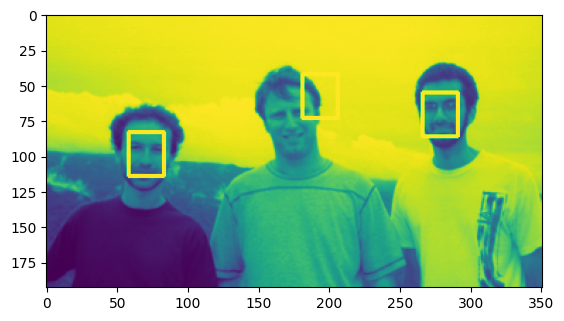

In [4]:
############### Detect faces in vjm.bmp ###############
# Load the image data/vjm.bmp
img = cv2.imread('data/vjm.bmp', cv2.IMREAD_GRAYSCALE)

# Normalize image to [0, 1]
img = img.astype('float32')
img = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX)

# Load the model
#model = keras.models.load_model(os.path.join(output_dir, 'face_model.keras'))

# Detect faces
face_size = (31, 25)
scale = 1.0
result_number = 3

# Time the function
start_time = time.time()
results, scores = cnn_face_search(img, model, face_size, scale, result_number)
end_time = time.time()
print('Time elapsed:', end_time - start_time)

# Scale image back to [0, 255]
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

# Draw bounding boxes
for result in results:
    (max_val, best_row, best_col, top, bottom, left, right) = result
    print(f"{best_row}, {best_col}")
    cv2.rectangle(img, (left, top), (right, bottom), 255, 2)

# Save the image
plt.imshow(img)

722/722 [==============================] - 5s 7ms/step
Time elapsed: 5.737419366836548
93.0, 153.0
185.0, 127.0


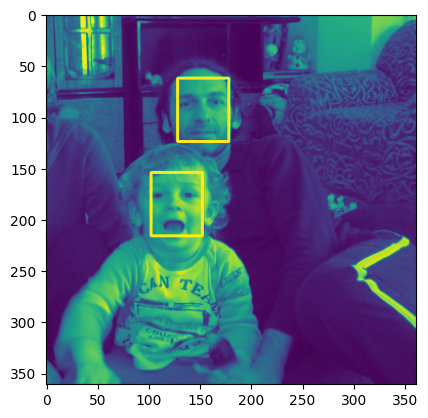

In [5]:
############### Detect faces in faces.bmp ###############
# Load the image data/faces.bmp
img = cv2.imread('data/faces.bmp', cv2.IMREAD_GRAYSCALE)

# Normalize image to [0, 1]
img = img.astype('float32')
img = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX)

# Load the model
#model = keras.models.load_model(os.path.join(output_dir, 'face_model.keras'))

# Detect faces
face_size = (31, 25)
scale = 2.0
result_number = 2

# Time the function
start_time = time.time()
results, scores = cnn_face_search(img, model, face_size, scale, result_number)
end_time = time.time()
print('Time elapsed:', end_time - start_time)

# Scale image back to [0, 255]
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

# Draw bounding boxes
for result in results:
    (max_val, best_row, best_col, top, bottom, left, right) = result
    print(f"{best_row}, {best_col}")
    cv2.rectangle(img, (left, top), (right, bottom), 255, 2)

plt.imshow(img)